In [13]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os

plt.rcParams.update({"font.size": 16})


In [5]:
plot_dir = "../../plots/inference_analysis/03_31_ak8/07_03_checks/"
os.system(f"mkdir -p {plot_dir}")

samples = ["bulkg_hflat", "bulkg_hsm", "HHbbVV", "qcd"]


In [3]:
events_dict = {}

for sample in samples:
    print(sample)
    events_dict[sample] = uproot.open(f"../../inferences/03_31_ak8/{sample}.root:Events").arrays()


bulkg_hflat
bulkg_hsm
HHbbVV
qcd


In [49]:
events_dict[sig].fields


['fj_isQCDb',
 'score_fj_isQCDb',
 'fj_isQCDbb',
 'score_fj_isQCDbb',
 'fj_isQCDc',
 'score_fj_isQCDc',
 'fj_isQCDcc',
 'score_fj_isQCDcc',
 'fj_isQCDothers',
 'score_fj_isQCDothers',
 'fj_H_VV_4q_3q',
 'score_fj_H_VV_4q_3q',
 'fj_H_VV_4q_4q',
 'score_fj_H_VV_4q_4q',
 'fj_pt',
 'fj_eta',
 'fj_phi',
 'fj_mass',
 'fj_subjet1_pt',
 'fj_subjet1_eta',
 'fj_subjet1_phi',
 'fj_subjet1_mass',
 'fj_subjet2_pt',
 'fj_subjet2_eta',
 'fj_subjet2_phi',
 'fj_subjet2_mass',
 'fj_msoftdrop',
 'fj_dR_V',
 'fj_dR_Vstar',
 'fj_PN_H4qvsQCD',
 'fj_genRes_mass',
 'fj_genVstar_mass',
 'fj_genV_pt',
 'fj_genVstar_pt',
 'fj_nprongs',
 'fj_H_VV_4q',
 'target_mass']

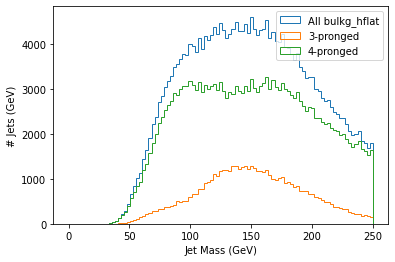

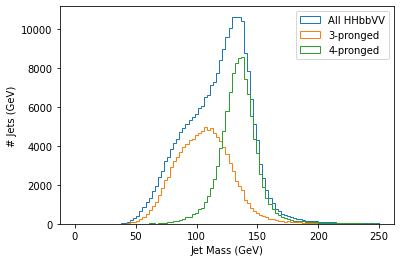

In [6]:
sigs = ["bulkg_hflat", "HHbbVV"]
for sig in sigs:
    events = events_dict[sig]

    plt.figure()
    _ = plt.hist(events["fj_mass"], np.linspace(0, 250, 100), histtype="step", label=f"All {sig}")
    _ = plt.hist(
        events["fj_mass"][events["fj_H_VV_4q_3q"] == 1],
        np.linspace(0, 250, 100),
        histtype="step",
        label="3-pronged",
    )
    _ = plt.hist(
        events["fj_mass"][events["fj_H_VV_4q_4q"] == 1],
        np.linspace(0, 250, 100),
        histtype="step",
        label="4-pronged",
    )
    plt.legend()
    plt.xlabel("Jet Mass (GeV)")
    plt.ylabel("# Jets (GeV)")
    plt.savefig(f"{plot_dir}/{sig}_fj_mass.pdf")


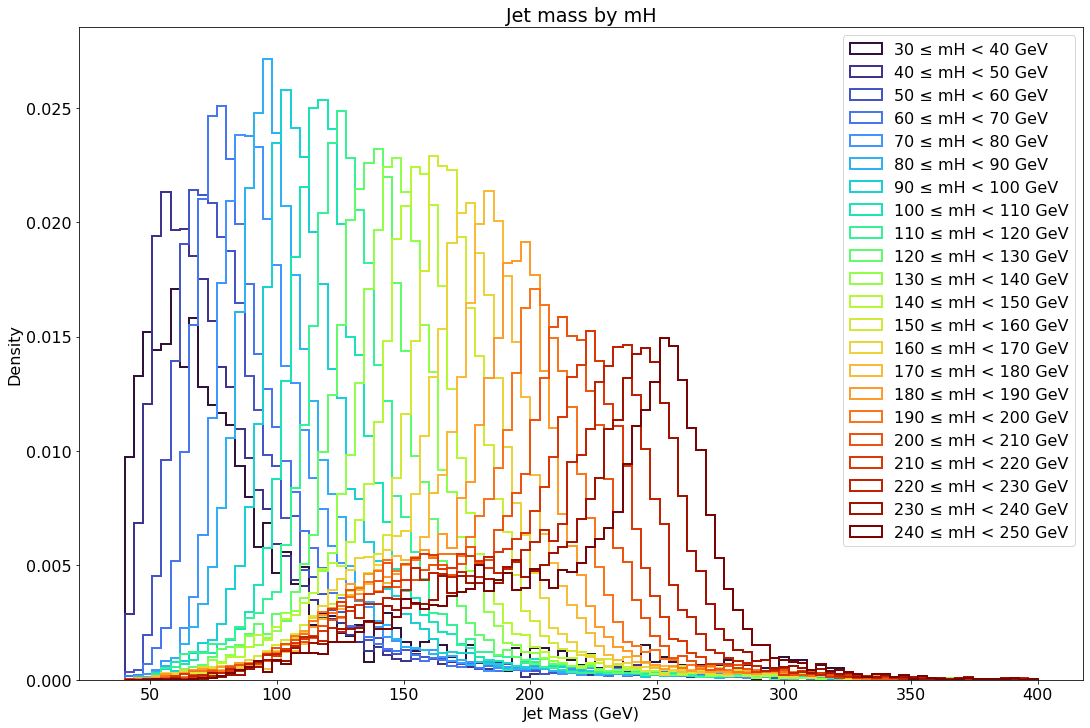

In [33]:
sig = "bulkg_hflat"
events = events_dict[sig]

mass_range = list(range(30, 251, 10))

n = len(mass_range) - 1
color = cm.turbo(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    mmin = mass_range[i]
    mmax = mass_range[i + 1]
    _ = plt.hist(
        events["fj_mass"][(events["fj_genRes_mass"] >= mmin) * (events["fj_genRes_mass"] < mmax)],
        np.linspace(40, 400, 100),
        histtype="step",
        label=f"{mmin} ≤ mH < {mmax} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Jet Mass (GeV)")
plt.ylabel("Density")
plt.title("Jet mass by mH")
plt.savefig(f"{plot_dir}/{sig}_fj_mass_by_mh.pdf")


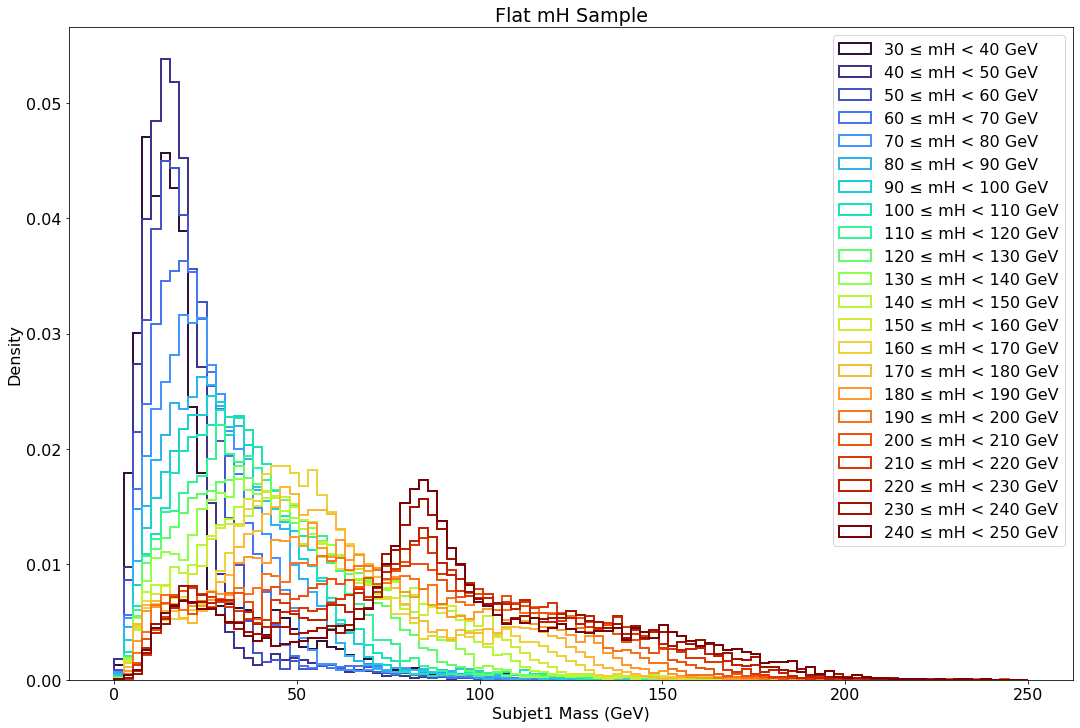

In [32]:
plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    mmin = mass_range[i]
    mmax = mass_range[i + 1]
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] >= mmin) * (events["fj_genRes_mass"] < mmax)
        ],
        np.linspace(0, 250, 100),
        histtype="step",
        label=f"{mmin} ≤ mH < {mmax} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh.pdf")


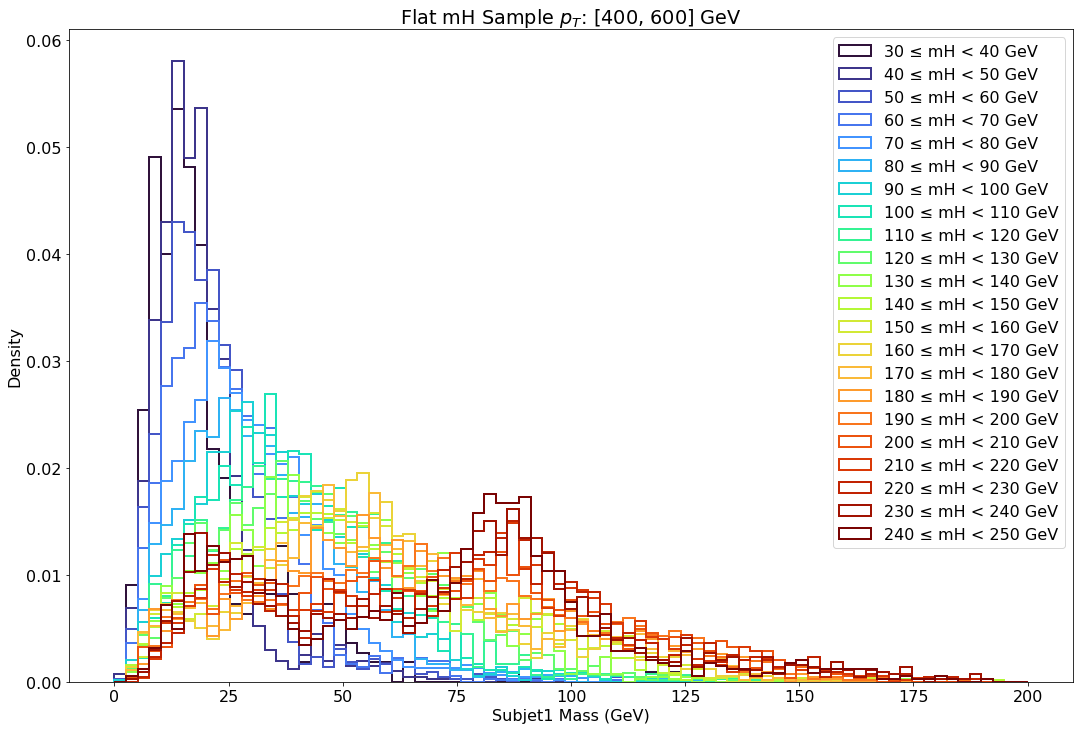

In [35]:
plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    mmin = mass_range[i]
    mmax = mass_range[i + 1]
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] >= mmin)
            * (events["fj_genRes_mass"] < mmax)
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
        ],
        np.linspace(0, 200, 80),
        histtype="step",
        label=f"{mmin} ≤ mH < {mmax} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh.pdf")


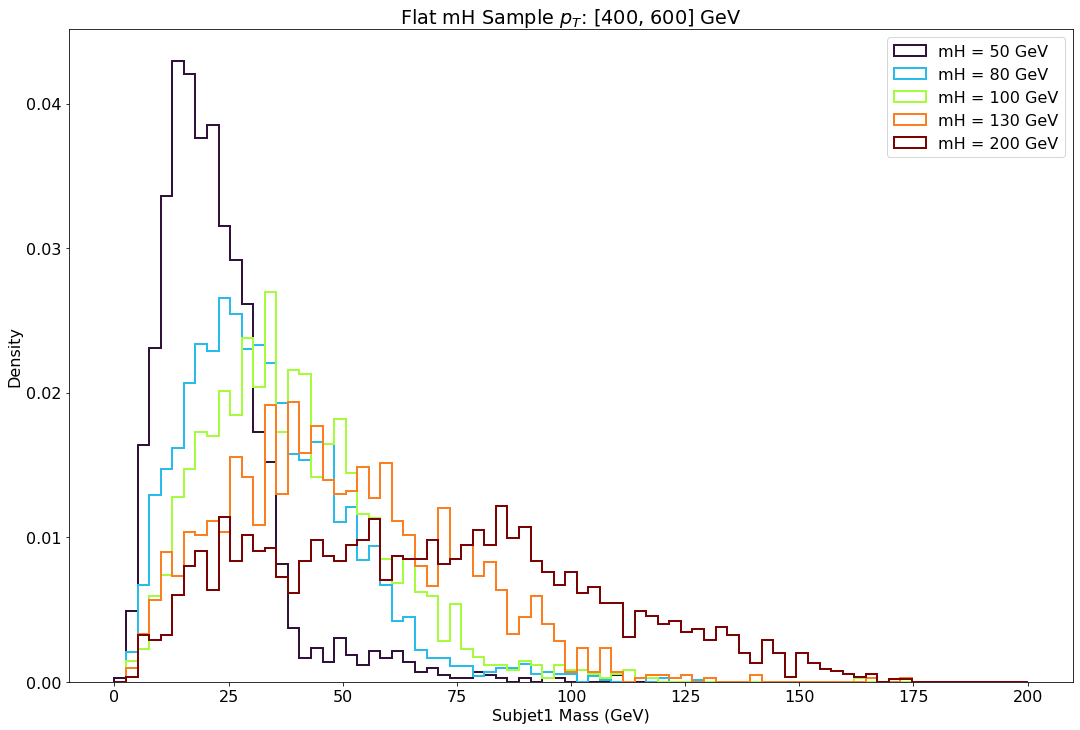

In [37]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.turbo(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
        ],
        np.linspace(0, 200, 80),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points.pdf")


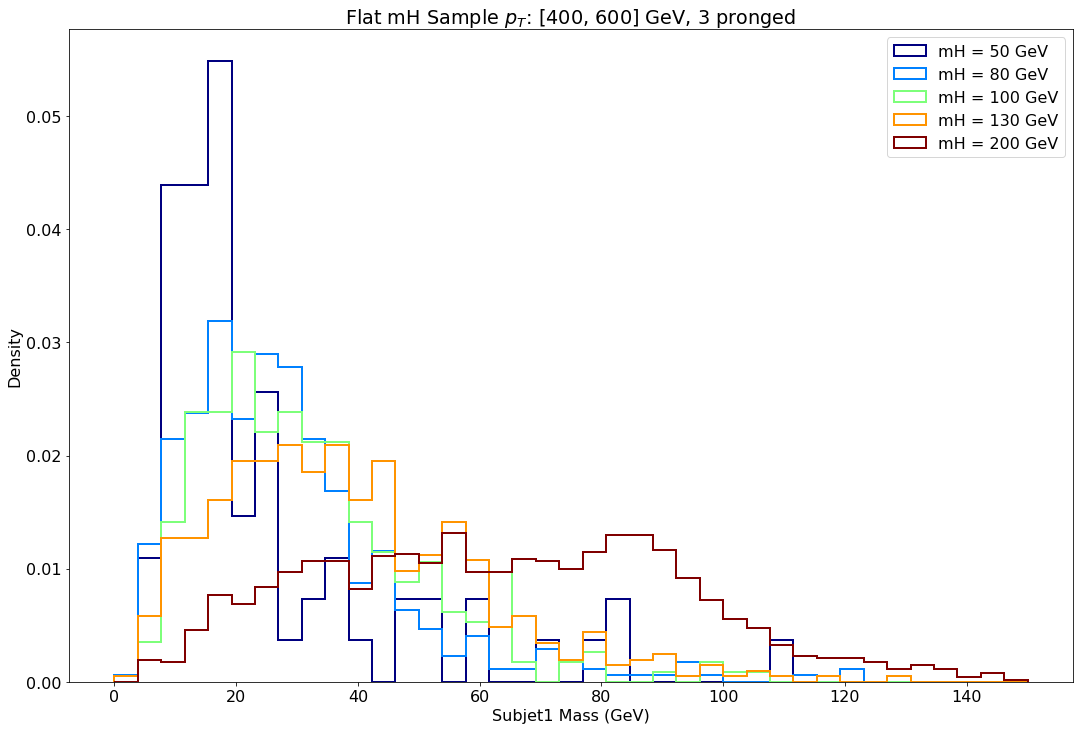

In [43]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_3_prongs_pt_400_600.pdf")


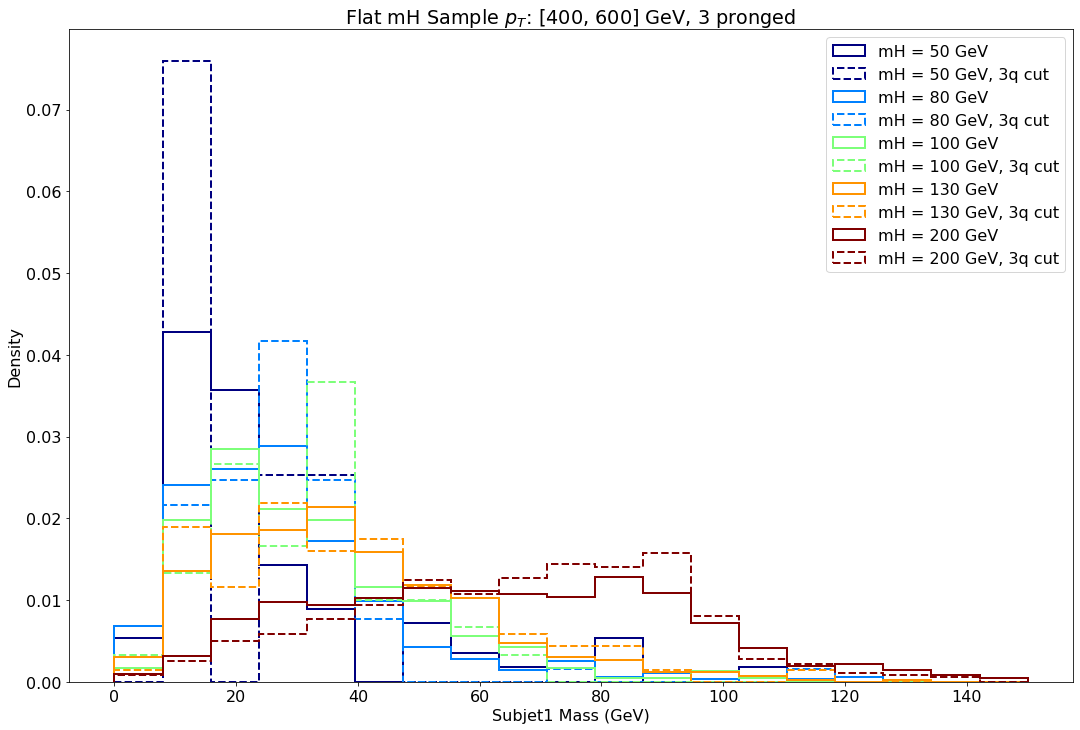

In [55]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 20),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
            * (events["score_fj_H_VV_4q_3q"] > 0.5)
        ],
        np.linspace(0, 150, 20),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV, 3q cut",
        linewidth=2,
        linestyle="dashed",
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_3_prongs_pt_400_600.pdf")


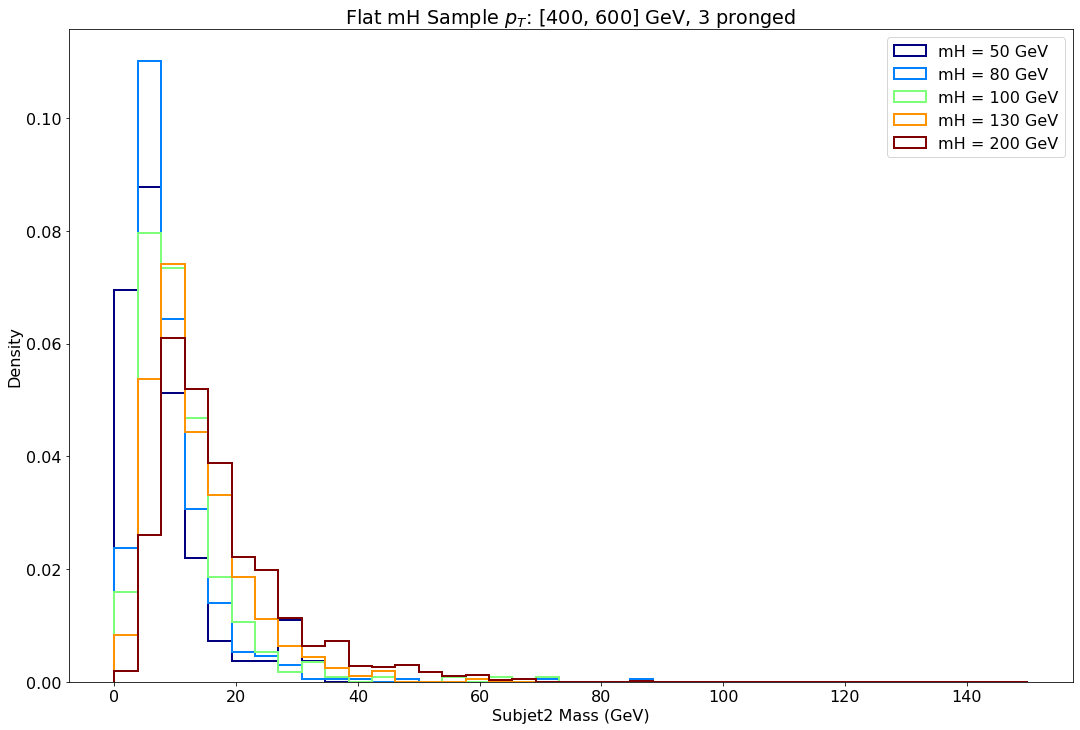

In [48]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet2 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 3 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet2_mass_by_mh_points_3_prongs_pt_400_600_3q_cut.pdf")


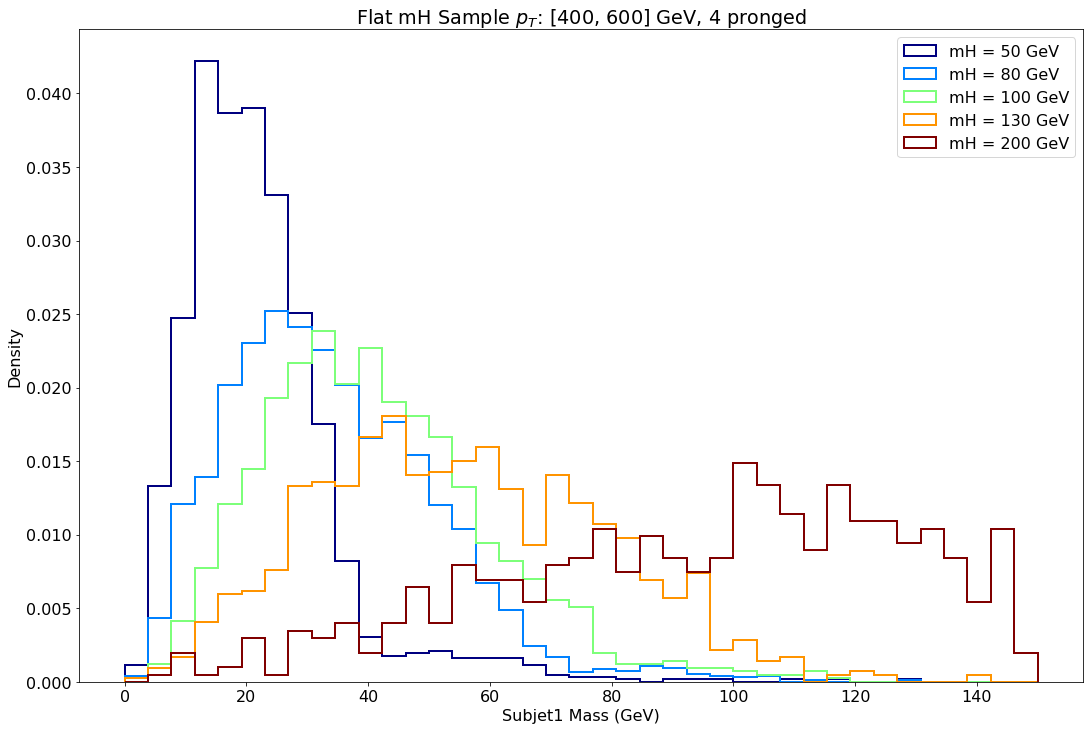

In [45]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 4)
        ],
        np.linspace(0, 150, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 4 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet1_mass_by_mh_points_4_prongs_pt_400_600.pdf")


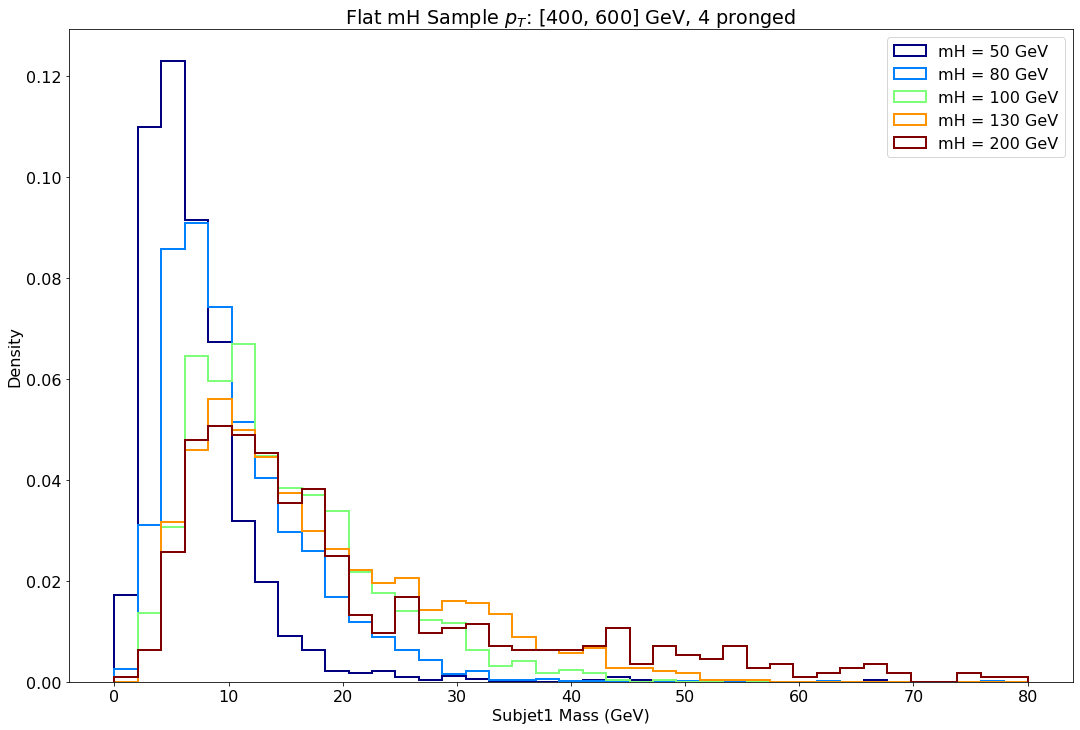

In [47]:
mass_points = [50, 80, 100, 130, 200]

n = len(mass_points)
color = cm.jet(np.linspace(0, 1, n))

plt.figure(figsize=(18, 12))
for i, c in zip(range(n), color):
    _ = plt.hist(
        events["fj_subjet2_mass"][
            (events["fj_genRes_mass"] == mass_points[i])
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 4)
        ],
        np.linspace(0, 80, 40),
        histtype="step",
        label=f"mH = {mass_points[i]} GeV",
        linewidth=2,
        color=c,
        density=True,
    )
plt.legend()
plt.xlabel("Subjet1 Mass (GeV)")
plt.ylabel("Density")
plt.title("Flat mH Sample $p_T$: [400, 600] GeV, 4 pronged")
plt.savefig(f"{plot_dir}/{sig}_fj_subjet2_mass_by_mh_points_4_prongs_pt_400_600.pdf")


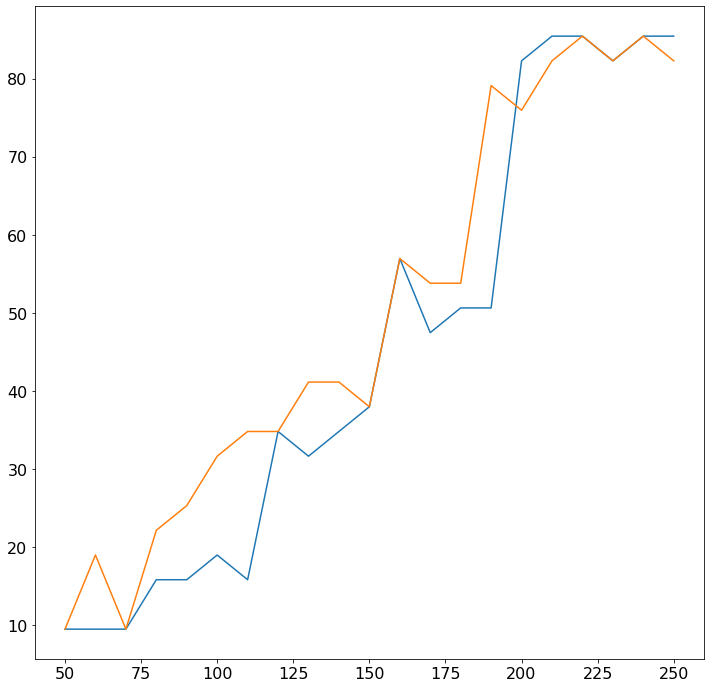

In [65]:
mass_points = np.arange(50, 251, step=10)
mass_range = np.linspace(0, 250, 80)
subjet1_mass_peak_3_prongs = []
subjet1_mass_peak_3_prongs_3q_cut = []

for mp in mass_points:
    sj1_mass = (
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mp)
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
        ],
    )
    sj1_mass_cut = (
        events["fj_subjet1_mass"][
            (events["fj_genRes_mass"] == mp)
            * (events["fj_pt"] >= 400)
            * (events["fj_pt"] < 600)
            * (events["fj_nprongs"] == 3)
            * (events["score_fj_H_VV_4q_3q"] > 0.3)
        ],
    )
    subjet1_mass_peak_3_prongs.append(mass_range[np.argmax(np.histogram(sj1_mass, mass_range)[0])])
    subjet1_mass_peak_3_prongs_3q_cut.append(mass_range[np.argmax(np.histogram(sj1_mass_cut, mass_range)[0])])

plt.figure(figsize=(12, 12))
plt.plot(mass_points, subjet1_mass_peak_3_prongs, label="Subjet1 mass peak")
plt.plot(mass_points, subjet1_mass_peak_3_prongs_3q_cut, label="Subjet1 mass peak, 3q cut")

